# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Load the Dataset

In [2]:
ESR = pd.read_csv('./dataset/clinical/data.csv')

In [3]:
ESR.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


/var/folders/jq/xzxylcjd0jgg602myzd5mbww0000gn/T/ipykernel_7082/2679232761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt>1]=0


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


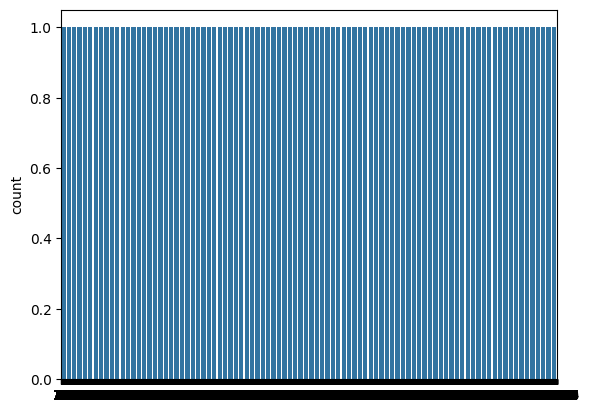

In [4]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

As we can see, there are 178 EEG features and 5 possible classes. The main goal of the dataset it's to be able to correctly identify epileptic seizures from EEG data, so a binary classification between classes of label 1 and the rest (2,3,4,5). In order to train our model, let's define our independent variables (X) and our dependent variable (y).

## &#128223; 1. Checking Missing Data

In [5]:
ESR.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
             ..
X175          0
X176          0
X177          0
X178          0
y             0
Length: 180, dtype: int64

# &#128203; Exploratory Data Analysis

In [6]:
ESR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [7]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [8]:
ESR.iloc[:,1:179] 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [9]:
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

In [10]:
X[1,:].shape

(178,)

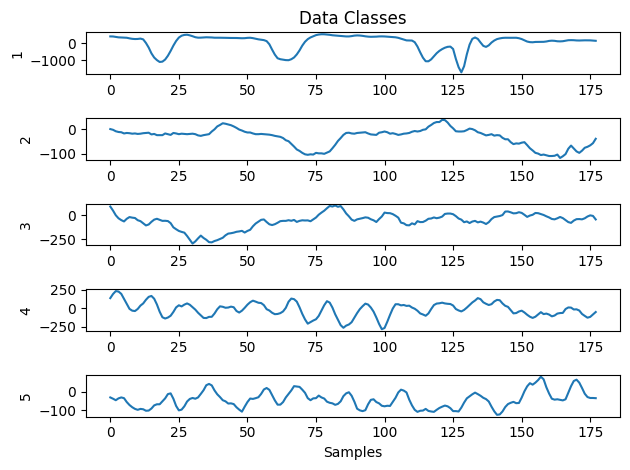

In [11]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Data Classes')
plt.ylabel('1')

plt.subplot(512)
plt.plot(X[7,:])
plt.ylabel('2')  # Label for the Y-axis

plt.subplot(513)
plt.plot(X[12,:])
plt.ylabel('3')  # Label for the Y-axis

plt.subplot(514)
plt.plot(X[0,:])
plt.ylabel('4')  # Label for the Y-axis

plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')  # Label for the X-axis
plt.ylabel('5')  # Label for the Y-axis

plt.tight_layout()  # Adjusts the layout so labels don't overlap
plt.show()

In [12]:
y = ESR.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0])

To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

In [13]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

# Building Machine Learning Models

##  Splitting the Dataset into the Training set and Test set


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 1. Logistic Regression


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

def evaluate_classification_metrics(y_true, y_pred, y_pred_prob):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)
    
    # Print metrics
    print(f'Accuracy: {accuracy * 100:.2f} %')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC-AUC: {roc_auc:.2f}')
    print(f'Cohen\'s Kappa: {kappa:.2f}')
    
    # Return metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'kappa': kappa
    }

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
# acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC
metrics_lr = evaluate_classification_metrics(y_test, y_pred_log_reg, y_pred_prob)

Accuracy: 80.09 %
Precision: 0.95
Recall: 0.08
F1 Score: 0.14
ROC-AUC: 0.53
Cohen's Kappa: 0.11


Observations:
1. The ROC-AUC score of 0.55 is very close to 0.5, which suggests that the model’s ability to distinguish between the positive and negative classes is almost random.
2. A recall of 0.08 means that the model identifies only 8% of the actual positive cases. This suggests that the model is missing many actual positives (high false negatives).

Concusions:

Check for class imbalance

In [18]:
y_train_series = pd.Series(y_train)
y_train_series.value_counts(normalize=True) * 100

0    80.358696
1    19.641304
dtype: float64

Approximately 80% of data is from non-seizure class. Let's try to balance the data

In [19]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_balanced, y_train_balanced)
y_pred_log_reg = clf.predict(X_test)
# acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC
metrics_lr_bal = evaluate_classification_metrics(y_test, y_pred_log_reg, y_pred_prob)

Accuracy: 68.39 %
Precision: 0.33
Recall: 0.44
F1 Score: 0.38
ROC-AUC: 0.52
Cohen's Kappa: 0.17


/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression is still underperforming. Let's try few more models

# 2.Support Vector Machine (SVM)


In [21]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
metrics_svc = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)

Accuracy: 97.52 %
Precision: 0.96
Recall: 0.93
F1 Score: 0.94
ROC-AUC: 1.00
Cohen's Kappa: 0.93


This shows significant improvement in performance

In [22]:

# Train SVC with balanced data
clf = SVC()
clf.fit(X_train_balanced, y_train_balanced)

# Make predictions on original test set
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test)

# Evaluate metrics
metrics_svc_bal = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)

Accuracy: 97.43 %
Precision: 0.91
Recall: 0.98
F1 Score: 0.94
ROC-AUC: 0.99
Cohen's Kappa: 0.93


# Linear SVM

In [23]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test)
metrics_l_svc = evaluate_classification_metrics(y_test, y_pred_linear_svc, y_pred_prob)

Accuracy: 80.09 %
Precision: 0.95
Recall: 0.08
F1 Score: 0.14
ROC-AUC: 0.52
Cohen's Kappa: 0.11


In [24]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train_balanced, y_train_balanced)
y_pred_linear_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test)
metrics_l_svc_bal = evaluate_classification_metrics(y_test, y_pred_linear_svc, y_pred_prob)

Accuracy: 68.43 %
Precision: 0.33
Recall: 0.44
F1 Score: 0.38
ROC-AUC: 0.52
Cohen's Kappa: 0.17


# 3.*k*-Nearest Neighbors


In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
metrics_knn = evaluate_classification_metrics(y_test, y_pred_knn, y_pred_prob)

Accuracy: 92.04 %
Precision: 1.00
Recall: 0.63
F1 Score: 0.77
ROC-AUC: 0.92
Cohen's Kappa: 0.73


In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_balanced, y_train_balanced)
y_pred_knn = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
metrics_knn_bal = evaluate_classification_metrics(y_test, y_pred_knn, y_pred_prob)

Accuracy: 95.70 %
Precision: 0.96
Recall: 0.83
F1 Score: 0.89
ROC-AUC: 0.95
Cohen's Kappa: 0.87


# 4. Gaussian Naive Bayes


In [27]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
metrics_gnb = evaluate_classification_metrics(y_test, y_pred_gnb, y_pred_prob)

Accuracy: 95.96 %
Precision: 0.90
Recall: 0.91
F1 Score: 0.91
ROC-AUC: 0.98
Cohen's Kappa: 0.88


In [28]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_balanced, y_train_balanced)
y_pred_gnb = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
metrics_gnb_bal = evaluate_classification_metrics(y_test, y_pred_gnb, y_pred_prob)

Accuracy: 96.30 %
Precision: 0.89
Recall: 0.94
F1 Score: 0.92
ROC-AUC: 0.98
Cohen's Kappa: 0.89


# 5. Artificial Neural Networks(ANN)


## Modeling Artificial Neurons
Artificial neuron models are at their core simplified models based on biological neurons. This allows them to capture the essence of how a biological neuron functions. We usually refer to these artificial neurons as 'perceptrons'. So now lets take a look at what a perceptron looks like.
![Imgur](https://i.imgur.com/uvMRQ6R.jpg)
As shown in the diagram above a typical perceptron will have many inputs and these inputs are all individually weighted. The perceptron weights can either amplify or deamplify the original input signal. For example, if the input is 1 and the input's weight is 0.2 the input will be decreased to 0.2. These weighted signals are then added together and passed into the activation function. The activation function is used to convert the input into a more useful output. There are many different types of activation function but one of the simplest would be step function. A step function will typically output a 1 if the input is higher than a certain threshold, otherwise it's output will be 0.

In [22]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

## Implementing Artificial Neural Networks
So now you're probably wondering what an artificial neural network looks like and how it uses these artificial neurons to process information. In this tutorial we're going to be looking at feedforward networks and how their design links our perceptron together creating a functioning artificial neural network. Before we begin lets take a look at what a basic feedforward network looks like:
![Imgur](https://i.imgur.com/la4Rwn6.jpg)
Each input from the input layer is fed up to each node in the hidden layer, and from there to each node on the output layer. We should note that there can be any number of nodes per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer. Choosing the right number of nodes and layers is important later on when optimising the neural network to work well a given problem. As you can probably tell from the diagram, it's called a feedforward network because of how the signals are passed through the layers of the neural network in a single direction. These aren't the only type of neural network though. There are also feedback networks where its architecture allows signals to travel in both directions.

### Initializing the ANN

In [23]:
classifier = Sequential()

### Adding input layer and first hidden layer

In [27]:
Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178,units=1)

/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized keyword arguments passed to Dense: {'output_dim': 80, 'init': 'uniform'}

In [25]:
classifier.add()

TypeError: Dense.__init__() missing 1 required positional argument: 'units'

### Adding second hidden layer

In [ ]:
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))

### Adding the output layer

In [ ]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

### Compiling the ANN

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
acc_ANN = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_ANN) + '%')

# Principal Component Analysis (PCA)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
acc_PCA = round(pca.score(X_train, y_train) )
print (str(acc_PCA) + '%')

# Comparing Models

In [29]:
metrics_data = {
    'Logistic Regression': metrics_lr,
    'SVC': metrics_svc,
    'KNN': metrics_knn,
    'Naive Bayes': metrics_gnb,
    'Linear SVC': metrics_l_svc,
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics.T.sort_values(by='roc_auc', ascending=False)

,accuracy,precision,recall,f1_score,roc_auc,kappa
SVC,0.975217,0.956067,0.926978,0.941298,0.995614,0.925596
Naive Bayes,0.959565,0.898406,0.914807,0.906533,0.983954,0.880738
KNN,0.920435,1.000000,0.628803,0.772105,0.921766,0.726908
Logistic Regression,0.800870,0.948718,0.075051,0.139098,0.525789,0.111164
Linear SVC,0.800870,0.948718,0.075051,0.139098,0.518675,0.111164


In [30]:
metrics_data = {
    'Logistic Regression': metrics_lr_bal,
    'SVC': metrics_svc_bal,
    'KNN': metrics_knn_bal,
    'Naive Bayes': metrics_gnb_bal,
    'Linear SVC': metrics_l_svc_bal,
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics.T.sort_values(by='roc_auc', ascending=False)

,accuracy,precision,recall,f1_score,roc_auc,kappa
SVC,0.974348,0.910985,0.975659,0.942214,0.994595,0.925753
Naive Bayes,0.963043,0.892308,0.941176,0.916091,0.982791,0.892416
KNN,0.956957,0.962441,0.831643,0.892274,0.951907,0.865558
Logistic Regression,0.683913,0.325893,0.444219,0.375966,0.521626,0.170959
Linear SVC,0.684348,0.326379,0.444219,0.376289,0.520163,0.171559


# Conclusion
The aim of this study is to detect epileptic seizure using two different feature ex-traction methods and comparison performance of various machine learning algorithms.

# References
1. [Epileptic Seizure Recognition Research Paper](http://iwbbio.ugr.es/2014/papers/IWBBIO_2014_paper_1.pdf)

2. [Epileptics Seziure Recognition Github's HelpNotebook](https://github.com/erayon/seizures/blob/master/seizures_.ipynb)

3. [Epileptic Seizure Recognition Video](https://www.youtube.com/watch?v=sq0AhHtknBU)